In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score,recall_score, f1_score, classification_report, accuracy_score
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import scipy.sparse
import nltk
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/miriam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/miriam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# 1. Loading and visualizing

In [2]:
#Read

Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")

In [3]:
Train.size

38065

In [4]:
import os
print (os.getcwd())

/Users/miriam/Desktop/UPM/Intelligent systems/NLP


In [5]:
Train.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [6]:
print(Train.shape, Test.shape)

(7613, 5) (3263, 4)


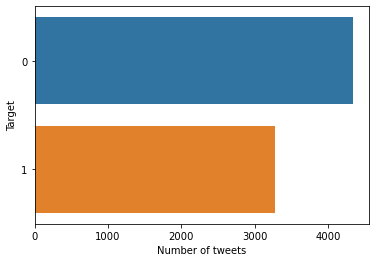

In [7]:
#Visualizing class 
plt.figure()
sns.countplot(y='target',data = Train)
plt.ylabel("Target")
plt.xlabel("Number of tweets")
plt.show()

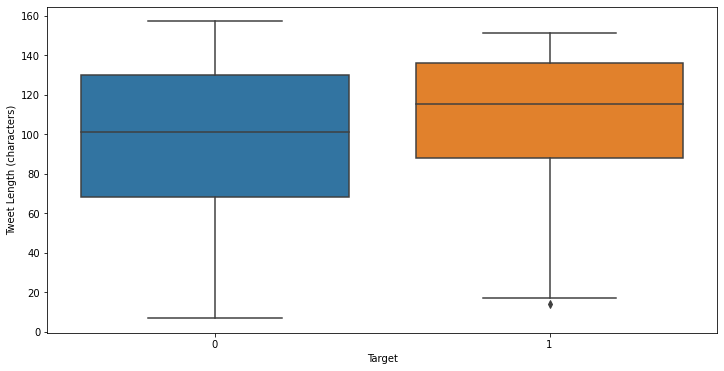

In [8]:
#Visualizing tweet length (characaters)
plt.figure(figsize=(12,6))
train_len = Train['text'].str.len()
sns.boxplot(x="target",y=train_len,data=Train)
plt.xlabel("Target")
plt.ylabel("Tweet Length (characters)")
plt.show()

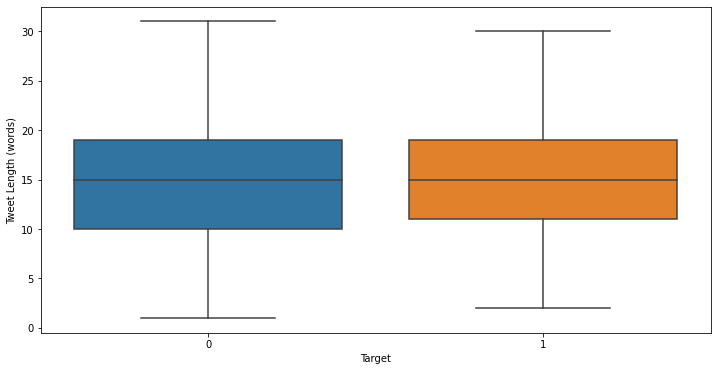

In [9]:
#Visualizing tweet length (words)
plt.figure(figsize=(12,6))
train_len =Train['text'].str.split().map(lambda x : len(x))
sns.boxplot(x="target",y=train_len,data=Train)
plt.xlabel("Target")
plt.ylabel("Tweet Length (words)")
plt.show()

## Null values

In [10]:
Train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [11]:
Test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

# 1. Preprocessing

In [12]:
text_train= Train['text']
text_test= Test['text']

### 1.1 Data cleaning

In [13]:
#Removing URLS
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

#Removing HTML tags
def remove_html_tags(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_emoji(text):
    emoji = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji.sub(r'', text)


Train['text']= Train['text'].apply(lambda x : remove_url(x))
Train['text']= Train['text'].apply(lambda x : remove_html_tags(x))
Train['text']= Train['text'].apply(lambda x : remove_emoji(x))

Test['text']= Test['text'].apply(lambda x : remove_url(x))
Test['text']= Test['text'].apply(lambda x : remove_html_tags(x))
Test['text']= Test['text'].apply(lambda x : remove_emoji(x))


In [14]:
Train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [15]:
Test.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


### 1.2 Normalization


In [16]:
#Lower cases
Train['text'] = Train['text'].str.lower()
Test['text'] = Test['text'].str.lower()

# Stemming and Stop words 
ps=PorterStemmer()
stop_words = set(stopwords.words("english"))
def normalization(tweet):
    tweet = tweet.lower()
    tokens = word_tokenize(tweet)
    tokens = [ps.stem(token) for token in tokens if token.isalpha() and not token in stop_words]
    tokens = " ".join(tokens)
        
    return tokens
Train['text'] = Train['text'].apply(normalization) 
Test['text'] = Test['text'].apply(normalization) 

In [17]:
Train.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask place notifi offic evacu shelter pla...,1
3,6,NaN,NaN,peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1
5,8,NaN,NaN,rockyfir updat california hwi close direct due...,1
6,10,NaN,NaN,flood disast heavi rain caus flash flood stree...,1
7,13,NaN,NaN,top hill see fire wood,1
8,14,NaN,NaN,emerg evacu happen build across street,1
9,15,NaN,NaN,afraid tornado come area,1


In [18]:
Test.head(20) 

,id,keyword,location,text
0,0,NaN,NaN,happen terribl car crash
1,2,NaN,NaN,heard earthquak differ citi stay safe everyon
2,3,NaN,NaN,forest fire spot pond gees flee across street ...
3,9,NaN,NaN,apocalyps light spokan wildfir
4,11,NaN,NaN,typhoon soudelor kill china taiwan
5,12,NaN,NaN,shake earthquak
6,21,NaN,NaN,probabl still show life arsen yesterday eh eh
7,22,NaN,NaN,hey
8,27,NaN,NaN,nice hat
9,29,NaN,NaN,fuck


# 3. Bag of words

In [19]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(Train['text'])
test_X= vectorizer.transform(Test['text'])


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Train['target'], test_size = 0.3)

## Linear regression

In [21]:
#LINEAR REGRESSION
from sklearn.metrics import classification_report
LR_model = LogisticRegression().fit(X_train, y_train)
predictions_train=LR_model.predict(X_test)
predictions_test = LR_model.predict(test_X)
print('Classification report...')
print(classification_report(y_test, predictions_train))
LR_score= LR_model.score(X_test, y_test)
print(LR_score)
misclassified_samples = X_test[y_test != predictions_train]

Classification report...
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1299
           1       0.82      0.68      0.75       985

    accuracy                           0.80      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284

0.8007880910683012


## SVM

In [22]:
#SVM
SVM_model = svm.SVC().fit(X_train, y_train)
predictions_train=SVM_model.predict(X_test)
predictions_test = SVM_model.predict(test_X)
print('Classification report...')
print(classification_report(y_test, predictions_train))
SVM_score= SVM_model.score(X_test, y_test)
print(SVM_score)

Classification report...
              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1299
           1       0.86      0.67      0.75       985

    accuracy                           0.81      2284
   macro avg       0.82      0.79      0.80      2284
weighted avg       0.82      0.81      0.80      2284

0.809106830122592


## RF

In [23]:
#RANDOM FOREST
rf_model = RandomForestClassifier().fit(X_train, y_train)
predictions_train=rf_model.predict(X_test)
predictions_test = rf_model.predict(test_X)
print('Classification report...')
print(classification_report(y_test, predictions_train))
rf_score= rf_model.score(X_test, y_test)
print(rf_score)

Classification report...
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      1299
           1       0.79      0.70      0.74       985

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284

0.792031523642732
